In [2]:
import astropy.units as u
from astroduet.duet_telescope import load_telescope_parameters
from astroduet.duet_sensitivity import src_rate, bgd_sky_qe_rate, bgd_electronics, calc_exposure
from astroduet.bbmag import bb_abmag_fluence
import numpy as np
from matplotlib import pyplot as plt
from astroduet.bbmag import bb_abmag_fluence, bb_abmag

import astroduet.config as config
from astroduet.background import background_pixel_rate


%load_ext autoreload
%autoreload 2

from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:

# Band1
# 5-sigma limiting magnitude in 1 and 5 stacked frames.

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope()

bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()

filter_type = 'B'
for qe_loss in [1.0]: #, 0.8, 0.77, 0.7, 0.5, 0.4]:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 20 
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=12e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('QE loss: {}'.format(qe_loss))
        print('Band1 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag1))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()


duet1_cbe_limit = bbmag1



B
QE loss: 1.0
Band1 900.0 s 5-σ magnitude limit: 22.43368761357837 mag(AB)
Rates:  0.1396049959121671 ph / s 0.01753365098332382 ph / s
41.88149877365013 ph 5.260095294997146 ph



In [17]:

# Band2
# 5-sigma limiting magnitude in 1 and 5 stacked frames.

duet = config.Telescope()
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()
filter_type = 'B'
for qe_loss in [1.0]:#, 0.8, 0.77, 0.7, 0.5, 0.4]:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 20 
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo)        
        print('QE loss: {}'.format(qe_loss))
        print('Band2 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag2))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()



duet2_cbe_limit = bbmag2



B
QE loss: 1.0
Band2 900.0 s 5-σ magnitude limit: 21.76198025121982 mag(AB)
Rates:  0.2429509268401836 ph / s 0.17922799624269026 ph / s
72.88527805205509 ph 53.768398872807076 ph



In [8]:

# Band1
# 5-sigma limiting magnitude in 1 to 15 stacked frames for plotting

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope()


#tot_bgd_rate = bgd_band1 + bgd_band2
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.05
print()

limit = []
frames = []
for filter_type in ['B']:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1

    swiftmag = 20
    for nframes in np.arange(15):
        nframes += 1
        snr = 100
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('Band1 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag1))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
        limit.append(bbmag1.value)
        frames.append(nframes)
        swiftmag -= 0.5




B
Band1 300.0 s 5-σ magnitude limit: 21.730542480741892 mag(AB)
Rates:  0.26115657255881525 ph / s 0.01753365098332382 ph / s
78.34697176764458 ph 5.260095294997146 ph

Band1 600.0 s 5-σ magnitude limit: 22.18054248074191 mag(AB)
Rates:  0.1725444363937269 ph / s 0.01753365098332382 ph / s
51.76333091811807 ph 5.260095294997146 ph

Band1 900.0 s 5-σ magnitude limit: 22.430542480741916 mag(AB)
Rates:  0.13705691757212424 ph / s 0.01753365098332382 ph / s
41.11707527163727 ph 5.260095294997146 ph

Band1 1200.0 s 5-σ magnitude limit: 22.58054248074193 mag(AB)
Rates:  0.11937158495693061 ph / s 0.01753365098332382 ph / s
35.811475487079186 ph 5.260095294997146 ph

Band1 1500.0 s 5-σ magnitude limit: 22.730542480741935 mag(AB)
Rates:  0.10396830417283501 ph / s 0.01753365098332382 ph / s
31.190491251850503 ph 5.260095294997146 ph

Band1 1800.0 s 5-σ magnitude limit: 22.830542480741943 mag(AB)
Rates:  0.094820220355077 ph / s 0.01753365098332382 ph / s
28.4460661065231 ph 5.260095294997146

In [9]:

# Band2
# 5-sigma limiting magnitude in 1 to 15 stacked frames for plotting

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope()


#tot_bgd_rate = bgd_band1 + bgd_band2
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.05
print()

limit2 = []
frames = []
for filter_type in ['B']:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2

    swiftmag = 20 


    for nframes in np.arange(15):
        nframes += 1
        snr = 100
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('Band2 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag2))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
        limit2.append(bbmag2.value)
        frames.append(nframes)
        swiftmag -= 0.5




B
Band2 300.0 s 5-σ magnitude limit: 21.141980251219504 mag(AB)
Rates:  0.4300496120314549 ph / s 0.17922799624269026 ph / s
129.01488360943648 ph 53.768398872807076 ph

Band2 600.0 s 5-σ magnitude limit: 21.541980251219517 mag(AB)
Rates:  0.29752164063502995 ph / s 0.17922799624269026 ph / s
89.25649219050898 ph 53.768398872807076 ph

Band2 900.0 s 5-σ magnitude limit: 21.791980251219524 mag(AB)
Rates:  0.23632983959789391 ph / s 0.17922799624269026 ph / s
70.89895187936817 ph 53.768398872807076 ph

Band2 1200.0 s 5-σ magnitude limit: 21.941980251219537 mag(AB)
Rates:  0.2058346855099239 ph / s 0.17922799624269026 ph / s
61.75040565297717 ph 53.768398872807076 ph

Band2 1500.0 s 5-σ magnitude limit: 22.091980251219542 mag(AB)
Rates:  0.1792745166292032 ph / s 0.17922799624269026 ph / s
53.782354988760964 ph 53.768398872807076 ph

Band2 1800.0 s 5-σ magnitude limit: 22.19198025121955 mag(AB)
Rates:  0.16350030238612337 ph / s 0.17922799624269026 ph / s
49.05009071583701 ph 53.7683988

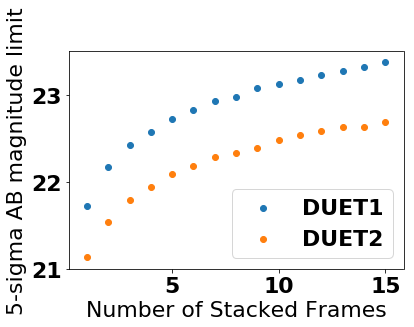

In [11]:
# Plot results
plt.scatter(frames, limit, label= 'DUET1')
plt.scatter(frames, limit2, label = 'DUET2')


plt.ylabel('5-sigma AB magnitude limit')
plt.xlabel('Number of Stacked Frames')
plt.legend()
plt.show()

f = open('DUET_limits.txt', 'w')
for fr, l1, l2, in zip(frames, limit, limit2):
    f.write('{} {} {}\n'.format(fr, l1, l2))
f.close()



In [18]:
def calc_margin(ab1, ab2):
    dmag = (ab1 - ab2)
    flux_ratio = 10**(0.4*dmag)
    margin = flux_ratio - 1.0
    return margin


In [22]:
print(duet1_cbe_limit)
print(duet2_cbe_limit)



22.43368761357837 mag(AB)
21.76198025121982 mag(AB)


In [25]:

# Band1
# 5-sigma limiting magnitude in 1 and 5 stacked frames.
margin_target = 0.3

duet = config.Telescope()
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()
filter_type = 'B'

margin = 0.
qe_loss = 0.8
while( (margin < margin_target) ):
    qe_loss -= 0.01

    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = duet1_cbe_limit.value - 1.0
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo)        
        margin = calc_margin(duet1_cbe_limit.value, bbmag1.value)
        print('QE Drop: {}, Limit: {}, Margin: {}, SNR: {}'.format(qe_loss, bbmag1, margin, snr))



QE Drop: 0.89, Limit: 22.294230094320373 mag(AB), Margin: 0.13705902003108572, SNR: 4.9721918285641875
QE Drop: 0.88, Limit: 22.284230094320367 mag(AB), Margin: 0.14758009760590518, SNR: 4.967910934018388
QE Drop: 0.87, Limit: 22.27423009432037 mag(AB), Margin: 0.1581985255129208, SNR: 4.963069301221574
QE Drop: 0.86, Limit: 22.254230094320366 mag(AB), Margin: 0.17973104374444104, SNR: 4.998932713122917
QE Drop: 0.85, Limit: 22.24423009432036 mag(AB), Margin: 0.19064696069334186, SNR: 4.9928844255335445
QE Drop: 0.84, Limit: 22.234230094320363 mag(AB), Margin: 0.2016638813781857, SNR: 4.986235508538651
QE Drop: 0.83, Limit: 22.224230094320358 mag(AB), Margin: 0.21278274037505018, SNR: 4.978973586592289
QE Drop: 0.82, Limit: 22.21423009432036 mag(AB), Margin: 0.22400448090750746, SNR: 4.9710860316265295
QE Drop: 0.8099999999999999, Limit: 22.204230094320355 mag(AB), Margin: 0.23533005492670167, SNR: 4.962559956230085
QE Drop: 0.7999999999999999, Limit: 22.184230094320352 mag(AB), Marg

In [26]:

# Band2
# 5-sigma limiting magnitude in 1 and 5 stacked frames.
margin_target = 0.3

duet = config.Telescope()
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()
filter_type = 'B'

margin = 0.
qe_loss = 0.8
while( (margin < margin_target)):
    qe_loss -= 0.01

    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 21
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo)        
        margin = calc_margin(duet2_cbe_limit.value, bbmag2.value)
        print('QE Drop: {}, Limit: {}, Margin: {}, SNR: {}'.format(qe_loss, bbmag2, margin, snr))





QE Drop: 0.79, Limit: 21.60198025121964 mag(AB), Margin: 0.15877735615531963, SNR: 4.9730301919680855
QE Drop: 0.78, Limit: 21.591980251219635 mag(AB), Margin: 0.16949939102007172, SNR: 4.976693838525431
QE Drop: 0.77, Limit: 21.581980251219637 mag(AB), Margin: 0.18032063565193024, SNR: 4.979771509199775
QE Drop: 0.76, Limit: 21.57198025121963 mag(AB), Margin: 0.19124200802758295, SNR: 4.982245898619558
QE Drop: 0.75, Limit: 21.561980251219634 mag(AB), Margin: 0.20226443461762056, SNR: 4.984099201606802
QE Drop: 0.74, Limit: 21.55198025121963 mag(AB), Margin: 0.21338885046519263, SNR: 4.985313094241233
QE Drop: 0.73, Limit: 21.54198025121963 mag(AB), Margin: 0.22461619926526377, SNR: 4.985868713953111
QE Drop: 0.72, Limit: 21.531980251219625 mag(AB), Margin: 0.23594743344473335, SNR: 4.985746638582894
QE Drop: 0.71, Limit: 21.521980251219627 mag(AB), Margin: 0.24738351424316574, SNR: 4.984926864339015
QE Drop: 0.7, Limit: 21.511980251219622 mag(AB), Margin: 0.258925411794398, SNR: 4.

In [29]:
# Margin = 30% (average between the two) gives QE loss of 25%
duet = config.Telescope()
qe_loss1 = 0.70
#(area / area0) = (0.76) = (r**2 / r0**2)
# r**2 = r0**2 * 0.76
r = (0.5*duet.eff_epd) * np.sqrt(qe_loss1)
new_epd = 2*r
print(duet.EPD, new_epd)

# QE loss 2, 60% QE loss
qe_loss2 = 0.4
r = (0.5*duet.eff_epd) * np.sqrt(qe_loss2)
new_epd = 2*r
print(duet.EPD, new_epd)

26.0 cm 20.49817065008485 cm
26.0 cm 15.49516053482506 cm


In [34]:
# Go edit config.py with the above numbers for the eff_epd attribute
duet_cbe = config.Telescope()
duet_requirement = config.Telescope(config='minimum_mass_requirement')
duet_threshold = config.Telescope(config='minimum_mass_threshold')



In [36]:
# Confirmation taht works.
print(duet_cbe.eff_area, duet_requirement.eff_area, duet_requirement.eff_area / duet_cbe.eff_area)
print(duet_cbe.eff_area, duet_threshold.eff_area, duet_threshold.eff_area / duet_cbe.eff_area)



471.43524757931834 cm2 329.99917865997173 cm2 0.6999883448563099
471.43524757931834 cm2 188.5701916758644 cm2 0.39999171178675547


In [38]:
# Sanity check. Since we split the difference, actually getting a bit more margin for this one.
# Band1

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope(config='minimum_mass_requirement')

bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()

filter_type = 'B'
for qe_loss in [1.0]:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 20 
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=12e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('QE loss: {}'.format(qe_loss))
        print('Band1 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag1))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()


print('Margin: {}'.format(calc_margin(duet1_cbe_limit.value, bbmag1.value)))




B
QE loss: 1.0
Band1 900.0 s 5-σ magnitude limit: 22.08368761357832 mag(AB)
Rates:  0.1348937316862607 ph / s 0.012273351331105051 ph / s
40.468119505878214 ph 3.6820053993315156 ph

0.38038426460294983


In [39]:

# Band2
# 5-sigma limiting magnitude in 1 and 5 stacked frames.

duet = config.Telescope(config='minimum_mass_requirement')
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()
filter_type = 'B'
for qe_loss in [1.0]:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 20 
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo)        
        print('QE loss: {}'.format(qe_loss))
        print('Band2 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag2))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()


print('Margin: {}'.format(calc_margin(duet2_cbe_limit.value, bbmag2.value)))







B
QE loss: 1.0
Band2 900.0 s 5-σ magnitude limit: 21.51198025121978 mag(AB)
Rates:  0.21409640212424727 ph / s 0.1254575084418337 ph / s
64.22892063727419 ph 37.637252532550114 ph

Margin: 0.2589254117942166


In [40]:

# Band1
# 5-sigma limiting magnitude in 1 and 5 stacked frames.

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope(config='minimum_mass_threshold')

bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()

filter_type = 'B'
for qe_loss in [1.0]:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 20 
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=12e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('QE loss: {}'.format(qe_loss))
        print('Band1 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag1))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()



print('Margin: {}'.format(calc_margin(duet1_cbe_limit.value, bbmag1.value)))






B
QE loss: 1.0
Band1 900.0 s 5-σ magnitude limit: 21.513687613578227 mag(AB)
Rates:  0.13030226131013323 ph / s 0.007013315070691223 ph / s
39.090678393039965 ph 2.1039945212073667 ph

Margin: 1.333458062281312


In [41]:

# Band2
# 5-sigma limiting magnitude in 1 and 5 stacked frames.

duet = config.Telescope(config='minimum_mass_threshold')
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()
filter_type = 'B'
for qe_loss in [1.0]:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 20 
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo)        
        print('QE loss: {}'.format(qe_loss))
        print('Band2 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag2))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()

print('Margin: {}'.format(calc_margin(duet2_cbe_limit.value, bbmag2.value)))









B
QE loss: 1.0
Band2 900.0 s 5-σ magnitude limit: 21.081980251219715 mag(AB)
Rates:  0.18178981707014238 ph / s 0.07168971301722386 ph / s
54.53694512104271 ph 21.50691390516716 ph

Margin: 0.8706821403659839
